# 1. Загрузите данные о выживаемости пассажиров Титаника из файла titanic_train.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_train.csv', index_col = 'PassengerId')

# 2. Представьте данные в виде таблицы. Посмотрите на первые и последние 5 строк.

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 3. Выведите на экран основную информацию (info) о наборе данных и признаках.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4. Выведите описательные статистики (медиану, среднее, квартили,минимальное, максимальное значения, дисперсию) массива данных в виде таблицы (describe).

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# 5. Избавьтесь от пустых значений, заменив их на медианные значения для количественных признаков и на последнее встречающееся значения с помощью метода “ffill” в аргументах функции fillna для категориальных.

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
df.fillna(df.median(), inplace = True) 

In [16]:
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

In [17]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 6. Выведите на экран сколько мужчин и сколько женщин находилось на борту?

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df.groupby('Sex')['Ticket'].count()

Sex
female    314
male      577
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='Sex'>

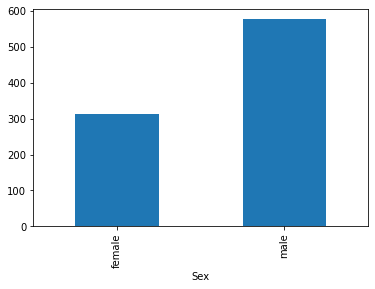

In [20]:
df.groupby('Sex')['Ticket'].count().plot(kind = 'bar')

# 7. Выведите распределение переменной  Pclass по всем классам (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

<AxesSubplot:>

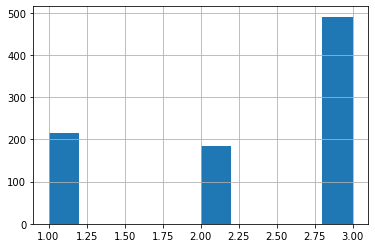

In [21]:
df['Pclass'].hist()

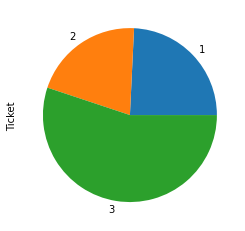

In [22]:
df.groupby('Pclass')['Ticket'].count().plot(kind = 'pie');

In [23]:
df.groupby(['Pclass', 'Sex'])['Ticket'].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Ticket, dtype: int64

## 108 мужчин 2 класса

# 8. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [34]:
round(df['Fare'].median(), 2)

14.45

In [35]:
round(df['Fare'].std(), 2)

49.69

In [36]:
m = df["Fare"].median()

In [37]:
s = df["Fare"].std()

In [38]:
print('median = {0}; std = {1};'.format(round(m,2), round(s,2)))

median = 14.45; std = 49.69;


# 9. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [39]:
young = df[(df['Age'] < 30) & (df['Survived'] == 1)]['Ticket'].count()

In [40]:
old = df[(df['Age'] > 60) & (df['Survived'] == 1)]['Ticket'].count()

In [41]:
young > old 

True

In [42]:
young_ = df[(df['Age'] < 30)]['Ticket'].count()
young / young_

0.37076648841354726

In [43]:
y = len(df[(df['Age'] < 30) & (df['Survived'] == 1)])
print('Количество выживших моложе 30 лет:', y)

Количество выживших моложе 30 лет: 208


In [44]:
o = len(df[(df['Age'] > 60) & (df['Survived'] == 1)])
print('Количество выживших старше 60 лет:', o)

Количество выживших старше 60 лет: 5


In [45]:
yp = y / len(df[(df['Age'] < 30)]) * 100
print('Доля выживших старше моложе 30 лет:', yp, '%')

Доля выживших старше моложе 30 лет: 37.076648841354725 %


In [46]:
op = o / len(df[(df['Age'] > 60)]) * 100
print('Доля выживших старше старше 60 лет:', op, '%')

Доля выживших старше старше 60 лет: 22.727272727272727 %


In [47]:
if yp > op:
    print('Правда')

Правда


# 10. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [48]:
f = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
print('Количество выживших женщин:', f)

Количество выживших женщин: 233


In [49]:
m = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
print('Количество выживших мужчин:', m)

Количество выживших мужчин: 109


In [50]:
fp = f / len(df[(df['Sex'] == 'female')]) * 100
print('Доля выживших женщин:', fp, '%')

Доля выживших женщин: 74.20382165605095 %


In [51]:
mp = m / len(df[(df['Sex'] == 'male')]) * 100
print('Доля выживших мужчин:', mp, '%')

Доля выживших мужчин: 18.890814558058924 %


In [52]:
if fp > mp:
    print('Правда')

Правда


# 11. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [90]:
df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [91]:
names = 'Allen, Mr. William Henry'
name_list = names.split('Mr. ')
name_list

['Allen, ', 'William Henry']

In [92]:
name_list[-1].split(' ')[0]

'William'

In [103]:
def split_name(Name):
    return Name.split('Mr. ')[1].split(' ')[0]

In [104]:
split_name('Braund, Mr. Owen Harris')

'Owen'

In [107]:
my_series_name = df[df['Sex'] == 'male'].Name.apply(split_name)
my_series_name.value_counts(ascending = False)

IndexError: list index out of range

# 12. Сравните графически распределение (гистограммы или ящики с усами) стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

In [59]:
import seaborn as sns

C:\Users\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


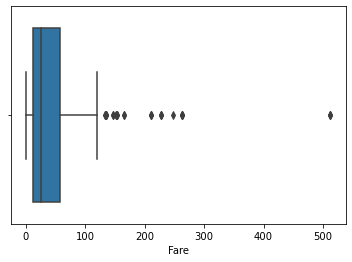

In [60]:
sns.boxplot(df[df['Survived']==1]['Fare']);

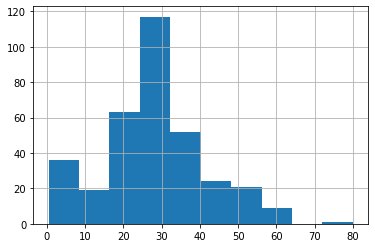

In [61]:
df[df['Survived']==1]['Age'].hist();

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (6,4)
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


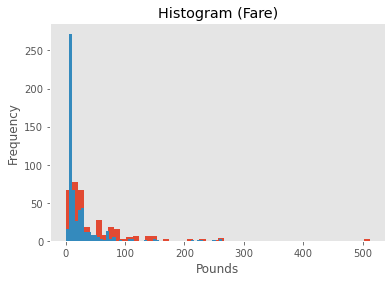

In [63]:
df[df['Survived'] == 1]['Fare'].hist(bins = 50);
df[df['Survived'] == 0]['Fare'].hist(bins = 50);
plt.title('Histogram (Fare)')
plt.grid();
plt.xlabel('Pounds');
plt.ylabel('Frequency');

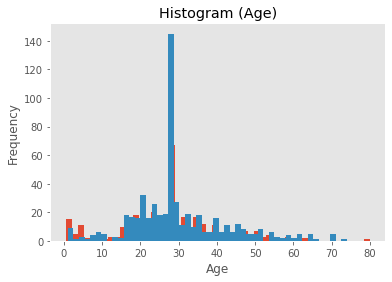

In [64]:
df[df['Survived'] == 1]['Age'].hist(bins = 50);
df[df['Survived'] == 0]['Age'].hist(bins = 50);
plt.title('Histogram (Age)')
plt.grid();
plt.xlabel('Age');
plt.ylabel('Frequency');

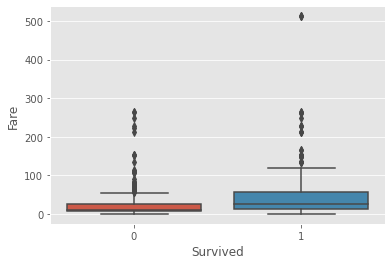

In [65]:
sns.boxplot(data = df, y = 'Fare', x = 'Survived');

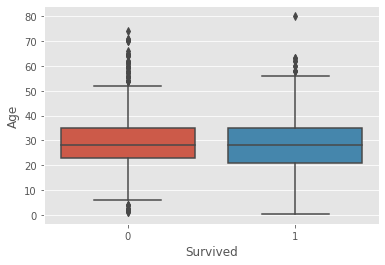

In [66]:
sns.boxplot(data = df, y = "Age", x = "Survived");

### Средний возраст погибших был больше, можно увидеть на последнем графике

# 13. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

In [67]:
pd.crosstab(df['Pclass'], df['Sex'], 
            values=df['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,33.978723,38.995246
2,28.703947,30.512315
3,23.572917,26.911873


#### В среднем мужчины 1-го класса старше 40 лет (Нет)
#### В среднем женщины 1-го класса старше 40 лет (Нет)
#### Мужчины всех классов в среднем старше женщин того же класса (Да)
#### В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса (Да)

# 14. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

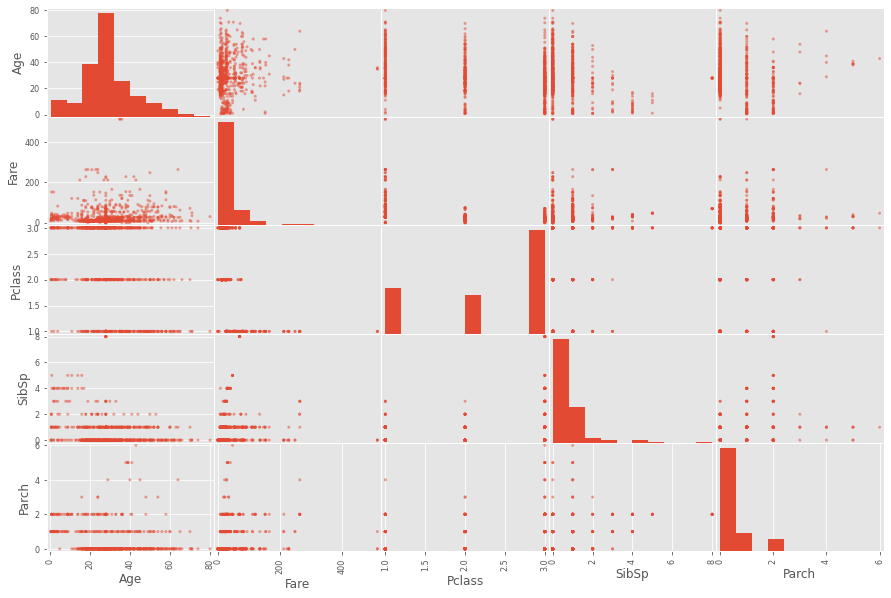

In [68]:
pd.plotting.scatter_matrix(df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch']], figsize=(15,10));

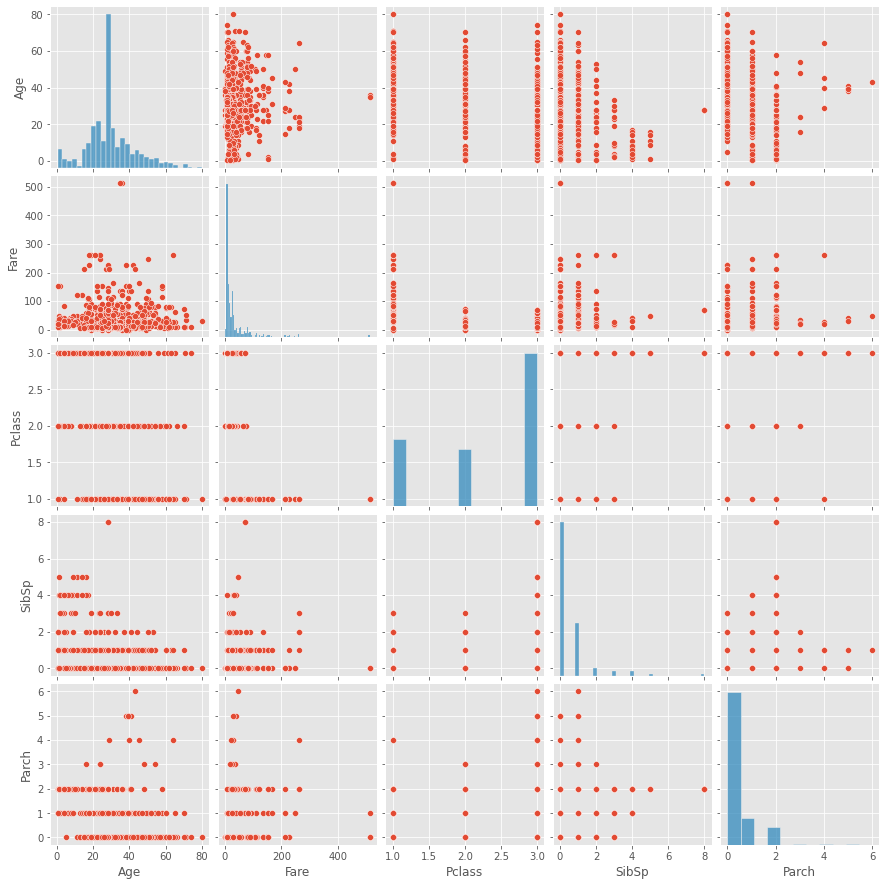

In [69]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch']]);

# 15. Постройте гистограммы распределения каждого признака (столбца данных).

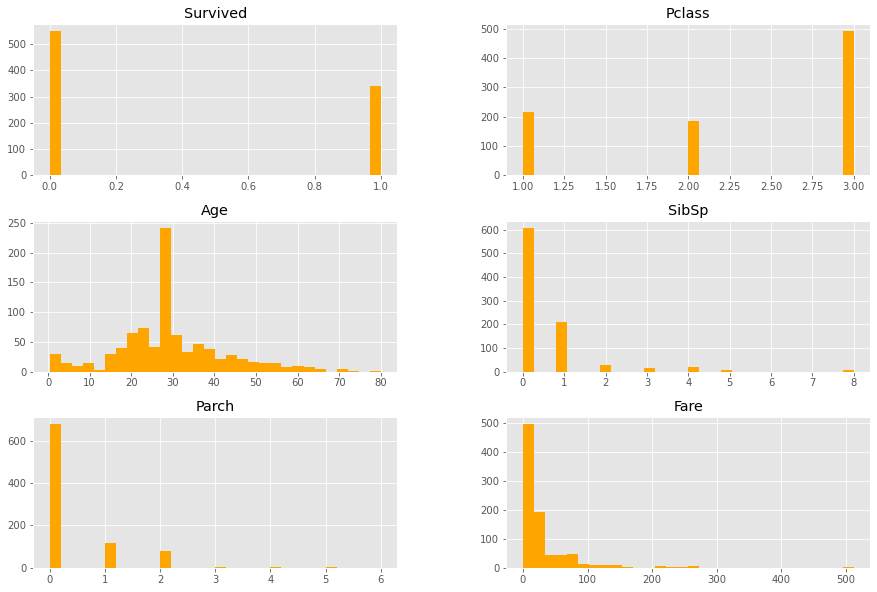

In [70]:
df.hist(figsize = (15, 10), color = 'orange', bins = 30);

# 16. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

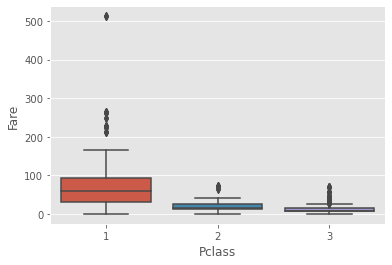

In [71]:
sns.boxplot(data=df, y = "Fare", x = "Pclass" );

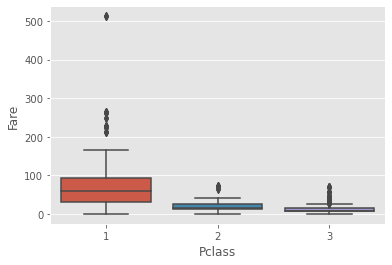

In [72]:
sns.boxplot(x = df['Pclass'], y = df['Fare']);

# 17. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

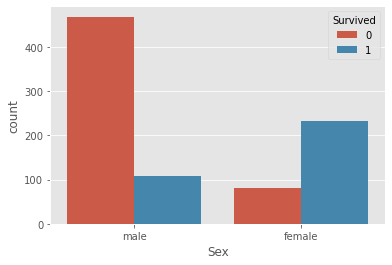

In [73]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df);

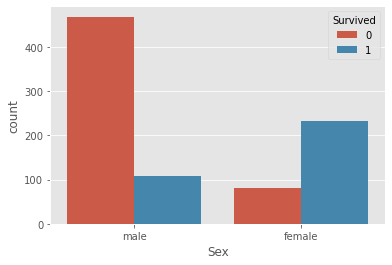

In [74]:
sns.countplot(x = df['Sex'], hue = df['Survived']);

# 18. Каково соотношение погибших и выживших в зависимости откласса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

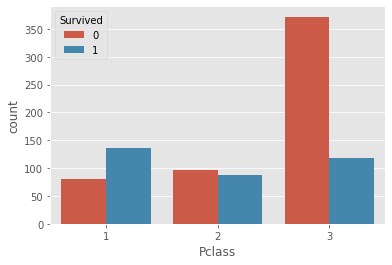

In [75]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df);

# 19. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

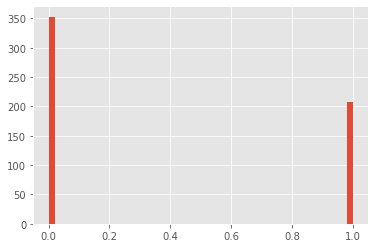

In [113]:
df[df['Age'] < 30]['Survived'].hist(bins = 50);
df[df['Survived'] > 60]['Survived'].hist(bins = 50);

# 20. Постройте график рассеяния на осях Age и Fare.  Cиним отметьте пассажиров, которые не выжили (Survived = 0) и красным — выживших (Survived = 1).

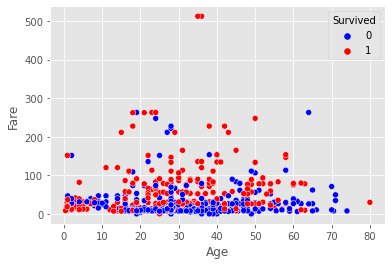

In [78]:
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived', palette = {1 : 'red', 0 : 'blue'});

# Дерево решений

In [2]:
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [15]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X,y)

NameError: name 'X' is not defined

In [16]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [18]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died','Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'X' is not defined